<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n250.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,90.808911,20.618954,121.427864,117.509244,3.918620
1,0.0,1.0,28.181895,0.650909,38.832804,22.909358,15.923446
2,0.0,2.0,40.415761,-13.071428,37.344334,41.388961,-4.044628
3,0.0,3.0,61.155181,-3.669839,67.485342,72.716442,-5.231101
4,0.0,4.0,29.694114,-36.189470,3.504644,25.193608,-21.688964
...,...,...,...,...,...,...,...
29995,999.0,25.0,90.461842,-15.457024,85.004818,111.731576,-26.726758
29996,999.0,26.0,28.899136,-7.957462,30.941674,38.087892,-7.146219
29997,999.0,27.0,39.513937,-15.000867,34.513071,50.785727,-16.272657
29998,999.0,28.0,30.674667,7.207741,47.882408,40.211851,7.670557


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,90.808911,20.618954,121.427864,117.509244,3.918620
1,0.0,1.0,28.181895,0.650909,38.832804,22.909358,15.923446
2,0.0,2.0,40.415761,-13.071428,37.344334,41.388961,-4.044628
3,0.0,3.0,61.155181,-3.669839,67.485342,72.716442,-5.231101
4,0.0,4.0,29.694114,-36.189470,3.504644,25.193608,-21.688964
...,...,...,...,...,...,...,...
29995,999.0,25.0,90.461842,-15.457024,85.004818,111.731576,-26.726758
29996,999.0,26.0,28.899136,-7.957462,30.941674,38.087892,-7.146219
29997,999.0,27.0,39.513937,-15.000867,34.513071,50.785727,-16.272657
29998,999.0,28.0,30.674667,7.207741,47.882408,40.211851,7.670557


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    90.808911  20.618954  121.427864  117.509244   3.918620
      1.0    28.181895   0.650909   38.832804   22.909358  15.923446
      2.0    40.415761 -13.071428   37.344334   41.388961  -4.044628
      3.0    61.155181  -3.669839   67.485342   72.716442  -5.231101
      4.0    29.694114 -36.189470    3.504644   25.193608 -21.688964
...                ...        ...         ...         ...        ...
999.0 25.0   90.461842 -15.457024   85.004818  111.731576 -26.726758
      26.0   28.899136  -7.957462   30.941674   38.087892  -7.146219
      27.0   39.513937 -15.000867   34.513071   50.785727 -16.272657
      28.0   30.674667   7.207741   47.882408   40.211851   7.670557
      29.0   95.405092 -54.064742   51.340350  117.644882 -66.304532

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    90.808911  20.618954  121.427864  117.509244   3.918620
      1.0    28.181895   0.650909   38.832804   22.909358  15.923446
      2.0    40.415761 -13.071428   37.344334   41.388961  -4.044628
      3.0    61.155181  -3.669839   67.485342   72.716442  -5.231101
      4.0    29.694114 -36.189470    3.504644   25.193608 -21.688964
...                ...        ...         ...         ...        ...
999.0 25.0   90.461842 -15.457024   85.004818  111.731576 -26.726758
      26.0   28.899136  -7.957462   30.941674   38.087892  -7.146219
      27.0   39.513937 -15.000867   34.513071   50.785727 -16.272657
      28.0   30.674667   7.207741   47.882408   40.211851   7.670557
      29.0   95.405092 -54.064742   51.340350  117.644882 -66.304532

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,90.808911,20.618954,121.427864,117.509244,3.918620
1,0.0,1.0,28.181895,0.650909,38.832804,22.909358,15.923446
2,0.0,2.0,40.415761,-13.071428,37.344334,41.388961,-4.044628
3,0.0,3.0,61.155181,-3.669839,67.485342,72.716442,-5.231101
4,0.0,4.0,29.694114,-36.189470,3.504644,25.193608,-21.688964
...,...,...,...,...,...,...,...
29995,999.0,25.0,90.461842,-15.457024,85.004818,111.731576,-26.726758
29996,999.0,26.0,28.899136,-7.957462,30.941674,38.087892,-7.146219
29997,999.0,27.0,39.513937,-15.000867,34.513071,50.785727,-16.272657
29998,999.0,28.0,30.674667,7.207741,47.882408,40.211851,7.670557


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    90.808911  20.618954  121.427864  117.509244   3.918620
      1.0    28.181895   0.650909   38.832804   22.909358  15.923446
      2.0    40.415761 -13.071428   37.344334   41.388961  -4.044628
      3.0    61.155181  -3.669839   67.485342   72.716442  -5.231101
      4.0    29.694114 -36.189470    3.504644   25.193608 -21.688964
...                ...        ...         ...         ...        ...
999.0 25.0   90.461842 -15.457024   85.004818  111.731576 -26.726758
      26.0   28.899136  -7.957462   30.941674   38.087892  -7.146219
      27.0   39.513937 -15.000867   34.513071   50.785727 -16.272657
      28.0   30.674667   7.207741   47.882408   40.211851   7.670557
      29.0   95.405092 -54.064742   51.340350  117.644882 -66.304532

[30000 rows x 5 columns]

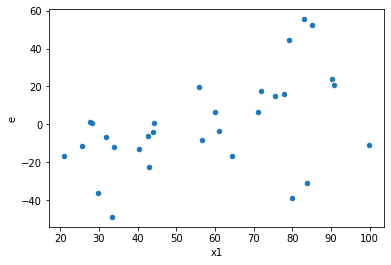

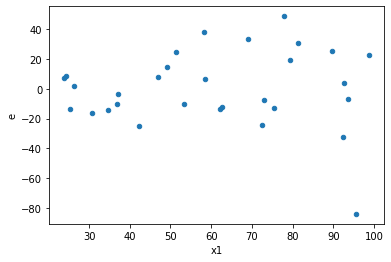

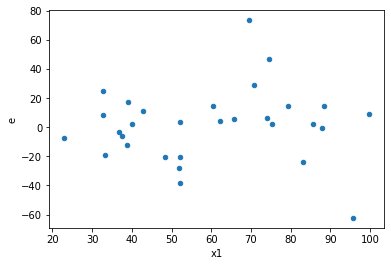

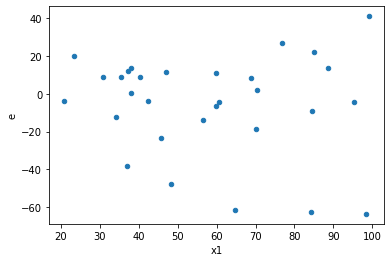

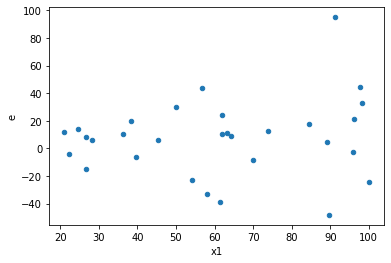

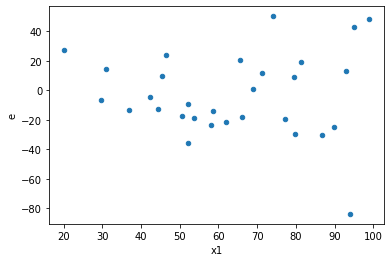

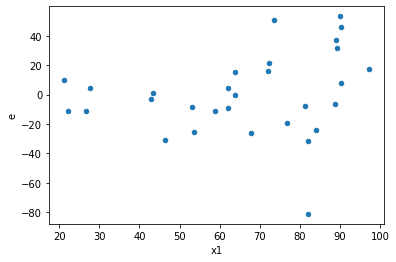

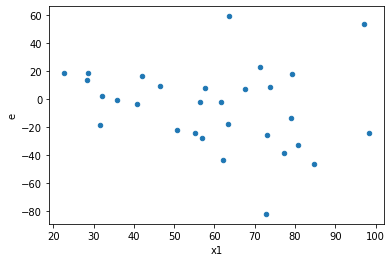

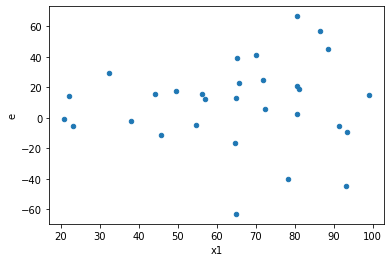

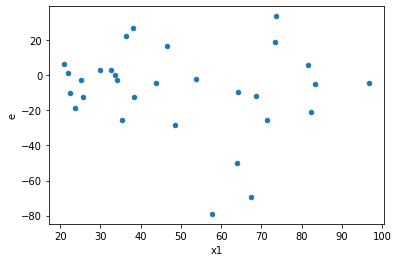

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,11.0,11.0,2452.297137459015,9739.62430965796,222.936103405365,885.4203917870873,3.9716330296539106,0.03097088788314628,0.9845145560584269,0.01548544394157314,Reject001=1 : Homoscedasticity
1.0,11.0,11.0,2156.360264616599,13249.85262019777,196.03275132878173,1204.5320563816153,6.144544971270649,0.005508473516004475,0.9972457632419978,0.0027542367580022376,Reject001=0 : Heteroscedasticity
2.0,11.0,11.0,2453.930508394751,7266.116706141031,223.0845916722501,660.5560641946391,2.9610116021150863,0.08540458995968248,0.9572977050201588,0.04270229497984124,Reject001=1 : Homoscedasticity
3.0,11.0,11.0,2837.9222952396703,14135.556600972768,257.9929359308791,1285.0506000884334,4.980952658458529,0.013021934279410452,0.9934890328602948,0.006510967139705226,Reject001=1 : Homoscedasticity
4.0,11.0,11.0,2381.3704198179344,13912.677489588565,216.48821998344857,1264.7888626898696,5.8422987762870795,0.0068046734436626455,0.9965976632781687,0.0034023367218313227,Reject001=0 : Heteroscedasticity
5.0,11.0,11.0,2471.1512288341855,17247.55195488194,224.65011171219868,1567.9592686256308,6.979561490867887,0.0031911774203958743,0.9984044112898021,0.0015955887101979371,Reject001=0 : Heteroscedasticity
6.0,11.0,11.0,1448.4456172190446,9510.157966051476,131.6768742926404,864.5598150955888,6.565768057147071,0.00415504736754202,0.997922476316229,0.00207752368377101,Reject001=0 : Heteroscedasticity
7.0,11.0,11.0,1818.3270117710167,14263.433200320085,165.30245561554696,1296.675745483644,7.844261845083501,0.0019075969638078227,0.9990462015180961,0.0009537984819039114,Reject001=0 : Heteroscedasticity
8.0,11.0,11.0,2082.366516156529,12776.564491753175,189.30604692332082,1161.5058628866523,6.135598316926056,0.005542419894370543,0.9972287900528147,0.0027712099471852714,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,2452.297137459015,9739.62430965796,222.936103405365,885.4203917870873,3.9716330296539106,0.03097088788314628,Reject001=1 : Homoscedasticity
1.0,11.0,11.0,2156.360264616599,13249.85262019777,196.03275132878173,1204.5320563816153,6.144544971270649,0.005508473516004475,Reject001=0 : Heteroscedasticity
2.0,11.0,11.0,2453.930508394751,7266.116706141031,223.0845916722501,660.5560641946391,2.9610116021150863,0.08540458995968248,Reject001=1 : Homoscedasticity
3.0,11.0,11.0,2837.9222952396703,14135.556600972768,257.9929359308791,1285.0506000884334,4.980952658458529,0.013021934279410452,Reject001=1 : Homoscedasticity
4.0,11.0,11.0,2381.3704198179344,13912.677489588565,216.48821998344857,1264.7888626898696,5.8422987762870795,0.0068046734436626455,Reject001=0 : Heteroscedasticity
5.0,11.0,11.0,2471.1512288341855,17247.55195488194,224.65011171219868,1567.9592686256308,6.979561490867887,0.0031911774203958743,Reject001=0 : Heteroscedasticity
6.0,11.0,11.0,1448.4456172190446,9510.157966051476,131.6768742926404,864.5598150955888,6.565768057147071,0.00415504736754202,Reject001=0 : Heteroscedasticity
7.0,11.0,11.0,1818.3270117710167,14263.433200320085,165.30245561554696,1296.675745483644,7.844261845083501,0.0019075969638078227,Reject001=0 : Heteroscedasticity
8.0,11.0,11.0,2082.366516156529,12776.564491753175,189.30604692332082,1161.5058628866523,6.135598316926056,0.005542419894370543,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      682
Reject001=0 : Heteroscedasticity    318
Name: Result_test, dtype: int64